In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data_df = pd.read_csv("DataForHW!COSC4337",sep = "\t", header=None, names=["feature_1","feature_2","class_label"])
X = data_df.loc[:, data_df.columns != "class_label"]
y = data_df.loc[:, data_df.columns == "class_label"]
print("orignal shape", data_df.shape)
print("X shape", X.shape)
print("y shape", y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#Normalizing
X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_train.mean())/X_train.std()

orignal shape (100, 3)
X shape (100, 2)
y shape (100, 1)


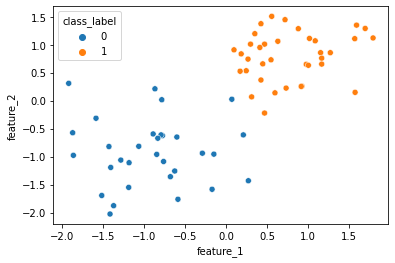

In [3]:
sns.scatterplot( x=X_train["feature_1"], y=X_train["feature_2"], hue=y_train["class_label"])

plt.show()

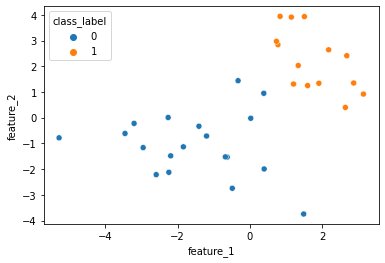

In [4]:
sns.scatterplot( x=X_test["feature_1"], y=X_test["feature_2"], hue=y_test["class_label"])
plt.show()

In [13]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights =  np.zeros(num_features+1)
        self.bias = 1
        self.learningRate = 0.01

    def forward(self, x):
        linear = np.sum((x.to_numpy()) * self.weights[:len(self.weights)-1], axis = 1 , initial = self.bias*self.weights[len(self.weights)-1])
        predictions = np.where(linear < 0 , 0 , 1).reshape(x.shape[0],1)
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        actual = y.to_numpy()
        errors = actual - predictions
        return errors
        
    def train(self, x, y, epochs):
        x_numpy = x.to_numpy()
        y_numpy = y.to_numpy()
        for e in range(epochs):
            error = self.backward(x,y)

            for i in range(y.shape[0]):
                for j in range (len(self.weights)-1):
                    self.weights[j] += error[i][0]*self.learningRate*x_numpy[i][j]
                    
                self.weights[len(self.weights)-1] += error[i][0]*self.learningRate*self.bias
                
                
    def evaluate(self, x, y):
        y_numpy = y.to_numpy()
        prediction = self.forward(x)
        accuracy = (np.sum(y_numpy==prediction)/y.shape[0])*100
        return accuracy


In [14]:
myPerceptron = Perceptron(2)
myPerceptron.train(X_train,y_train,5)

In [15]:
print(myPerceptron.evaluate(X_train,y_train))
print(myPerceptron.evaluate(X_test,y_test))

97.01492537313433
93.93939393939394


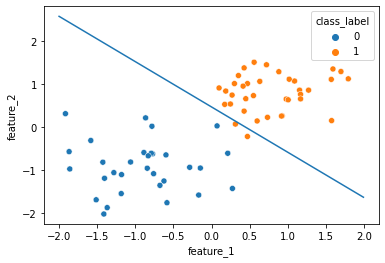

In [8]:
x_1 = np.arange(-2,2,0.01)
y_1 = -1*(((x_1*myPerceptron.weights[0]) + myPerceptron.weights[2]*myPerceptron.bias) / myPerceptron.weights[1])

sns.scatterplot( x=X_train["feature_1"], y=X_train["feature_2"], hue=y_train["class_label"])
plt.plot(x_1,y_1)
plt.show()

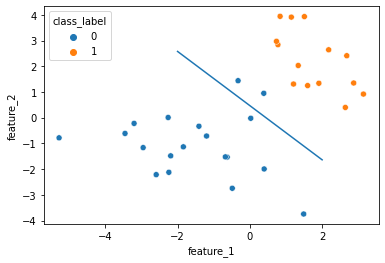

In [9]:
sns.scatterplot( x=X_test["feature_1"], y=X_test["feature_2"], hue=y_test["class_label"])
plt.plot(x_1,y_1)
plt.show()